In [ ]:
pip install qiskit-aer --user

In [ ]:
import qiskit
from qiskit import *
import numpy as np
from qiskit import QuantumCircuit, execute, Aer
from qiskit.quantum_info import Statevector, partial_trace
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from numpy import pi

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))
[0.938083151964686, 0.34641016151377546]


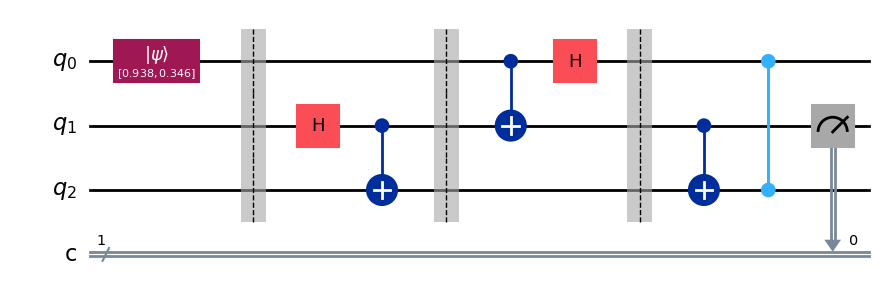

In [10]:
#circuit.rx(2*np.pi/3,0) #prepare q0 in cos(2p/6)|0>-i sin(2p/6)|1>

circuit=QuantumCircuit(3,1)
# circuit.rx(2*np.pi/3,0) #prepare q0 in cos(2p/6)|0>-i sin(2p/6)|1>
#𝜓 = [np.sqrt(0.7), np.sqrt(0.3)]
#print(𝜓)
#circuit.initialize(𝜓, 0) #q0 is prepared to |𝜓>
sv=Statevector.from_label('000') #8D statevector at the input
print(sv)
𝜓 = [np.sqrt(0.88), np.sqrt(0.12)]
print(𝜓)
circuit.initialize(𝜓, 0)

#circuit.x(0)
circuit.barrier()
circuit.h(1) #q1 = uniform superposition state
circuit.cx(1,2) #q1=control, q2=target
circuit.barrier() #vertical separator in circuit drawing

## Disentangle q0q1
circuit.cx(0,1) #q0=control, q1=target
circuit.h(0)
circuit.barrier()
circuit.cx(1,2)
circuit.cz(0,2) #qo=control, q2=target
circuit.measure([1],[0])

circuit.draw(output='mpl', style='iqp')

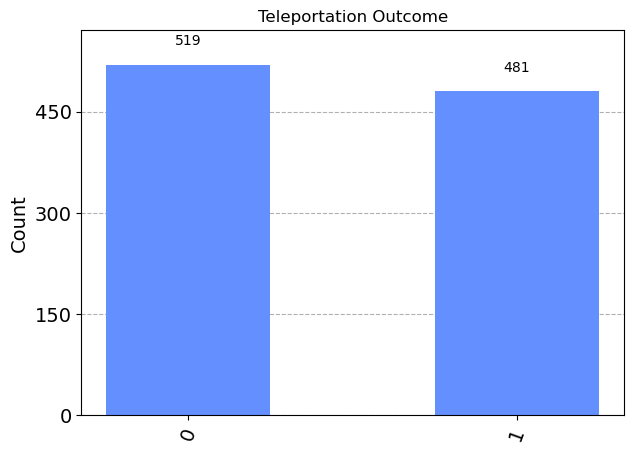

In [11]:
simulator = Aer.get_backend("qasm_simulator")
job = execute(circuit,simulator,shots=1000).result()

plot_histogram(job.get_counts(), title="Teleportation Outcome")

In [ ]:
import qiskit
qiskit.__version__

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))
Statevector([0.89442719+0.j, 0.4472136 +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j],
            dims=(2, 2, 2))


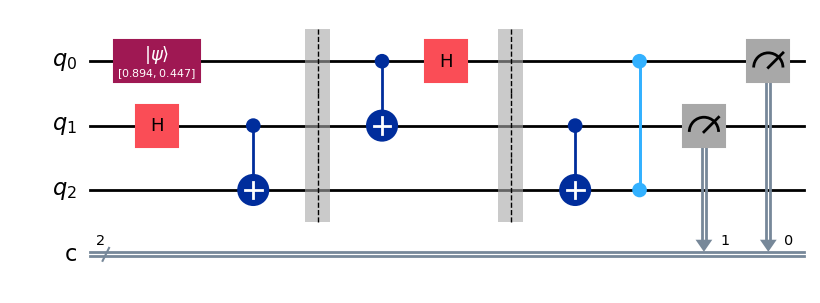

In [5]:
from qiskit import QuantumCircuit, execute, Aer 
from qiskit.quantum_info import Statevector, partial_trace 
from qiskit.visualization import plot_histogram, plot_bloch_multivector 
from numpy import pi 
import numpy as np 
circuit=QuantumCircuit(3,2) 
#circuit.rx(2*np.pi/5,0)   #prepare q0 in cos(2p/6)|0>-i sin(2p/6)|1> 
𝜓 = [np.sqrt(0.8), np.sqrt(0.2)] 
circuit.initialize(𝜓, 0)   #q0 is prepared to |𝜓> 
sv=Statevector.from_label('000')  #8D statevector at the input 
print(sv) 
sv=sv.evolve(circuit)   #walk thru the circuit (made above) 
print(sv)   #8D vector with |q2q1q0>=|00𝜓>. Note q0=LSB 
#entangle q1&q2 
circuit.h(1)  #q1 = control bit in uniform superposition state 
circuit.cx(1,2) #q1=control, q2=target 
##Here, q2q1q0 state is Sc,dXdZc|𝜓>|bdc> 
circuit.barrier()  #vertical separator in circuit drawing 
#disentangle the Bell basis states of q1q0. 
circuit.cx(0,1)  #q0=control, q1=target 
circuit.h(0) 
##Here, q2q1q0 state is Sc,dXdZc|𝜓>|dc> 
circuit.barrier() 
circuit.cx(1,2)  # q2 state becomes  Zc|𝜓> 
circuit.cz(0,2) # q2 state becomes |𝜓>; q2q1q0 state is |𝜓>Sc,d|dc> = |𝜓>|++> 
circuit.measure([0,1],[0,1]) #measure to collapse the q0 & q1 state 
circuit.draw(output='mpl', style='iqp') 

In [6]:
backend = Aer.get_backend("statevector_simulator") 
result = execute(circuit, backend=backend, shots=1).result()  #statevector simulation 
print(sv) #prepared |𝜓> on q0 
print('State Vector:', result.get_statevector() )  ## the 8D vector |q2q1q0>=|𝜓>|q1q0>  

Statevector([0.89442719+0.j, 0.4472136 +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j],
            dims=(2, 2, 2))
State Vector: Statevector([0.        +0.00000000e+00j, 0.89442719+0.00000000e+00j,
             0.        +0.00000000e+00j, 0.        +0.00000000e+00j,
             0.        +0.00000000e+00j, 0.4472136 -5.47678698e-17j,
             0.        +0.00000000e+00j, 0.        +0.00000000e+00j],
            dims=(2, 2, 2))


Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))
Statevector([0.89442719+0.j, 0.4472136 +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j],
            dims=(2, 2, 2))


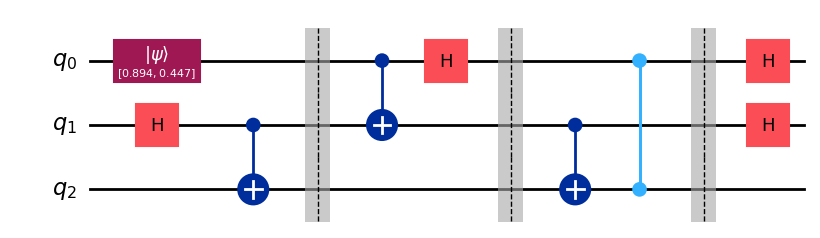

In [3]:
circuit2=QuantumCircuit(3)
#circuit.rx(2*np.pi/5,0)   #prepare q0 in cos(2p/6)|0>-i sin(2p/6)|1>
𝜓 = [np.sqrt(0.8), np.sqrt(0.2)]
circuit2.initialize(𝜓, 0)   #q0 is prepared
sv3=Statevector.from_label('000')
print(sv3)
sv3=sv3.evolve(circuit2)
print(sv3)   #8D vector with |q2q1>|q0>=|00>|𝜓>
#entangle q1&q2
circuit2.h(1)  #q1 = uniform superposition state
circuit2.cx(1,2) #q1=control, q2=target
circuit2.barrier()  #vertical separator in circuit drawing
# circuit.draw(output='mpl', style='iqp')
circuit2.cx(0,1)  #q0=control, q1=target
circuit2.h(0)
circuit2.barrier()
circuit2.cx(1,2)
circuit2.cz(0,2) #qo=control, q2=target
circuit2.barrier()
#by now, |q1q0>=|++>
circuit2.h(0)  #q0 to |0>
circuit2.h(1)  #q1 to |0>
circuit2.draw(output='mpl', style='iqp')

In [4]:
sv4=Statevector.from_label('000')
print(sv4)
print(sv3)  # |𝜓> is on q0
sv4=sv4.evolve(circuit2)  #|𝜓> is on q2
print(sv4)  # |𝜓> is on q2; and q1q0 is in |00>, Why

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))
Statevector([0.89442719+0.j, 0.4472136 +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j],
            dims=(2, 2, 2))
Statevector([8.94427191e-01+0.j, 0.00000000e+00+0.j, 7.26296882e-18+0.j,
             0.00000000e+00+0.j, 4.47213595e-01+0.j, 0.00000000e+00+0.j,
             3.63148441e-18+0.j, 0.00000000e+00+0.j],
            dims=(2, 2, 2))
